In [1]:
import pandas as pd
df = pd.read_csv("product_info.csv")
df.head()


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


# Q1: Which brands are the most popular?

In [3]:
# sum of loves_count
top_brands = df.groupby("brand_name")["loves_count"].sum()


In [4]:
# most liked 10 brands
top_brands = top_brands.sort_values(ascending=False).head(10)


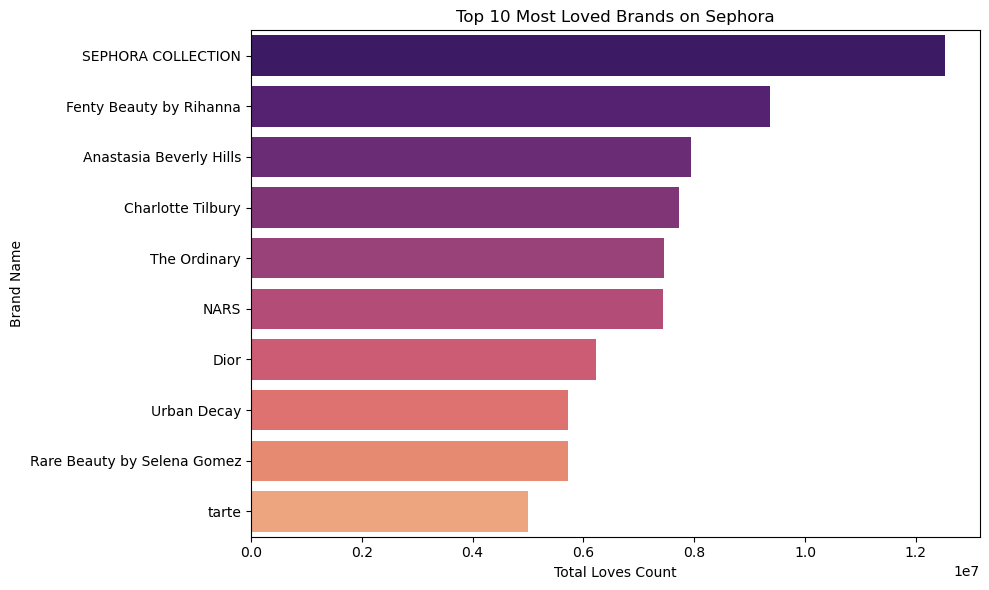

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Generate 10 colors from magma colormap using the new API
cmap = plt.colormaps["magma"]
colors = cmap(np.linspace(0.2, 0.8, 10)).tolist()  # convert to list!
# For Future Warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette=colors)
plt.title("Top 10 Most Loved Brands on Sephora")
plt.xlabel("Total Loves Count")
plt.ylabel("Brand Name")
plt.tight_layout()
plt.show()

Result: Beside Sephore Collection, brands like Anastasia Beverly Hills Fenty Beauty, and Charlotte Tilbury received the highest total "loves/likes".

# Q2:What is the average rating by product category?

In [8]:
category_ratings = df.groupby("primary_category")["rating"].mean().sort_values(ascending=False)

In [9]:
top_categories = category_ratings.head(10)

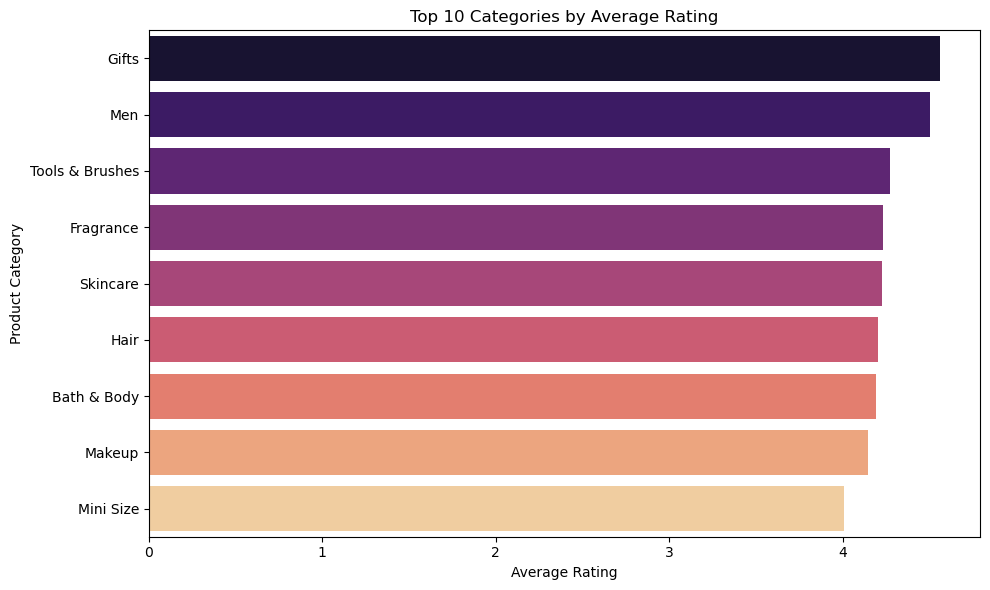

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

Result: Gifts and Men categories received the highest average ratings, while Mini Size had the lowest.

# Q3: Is there a relationship between product rating and price?

In [13]:
filtered_df = df[["rating", "child_max_price"]].dropna()

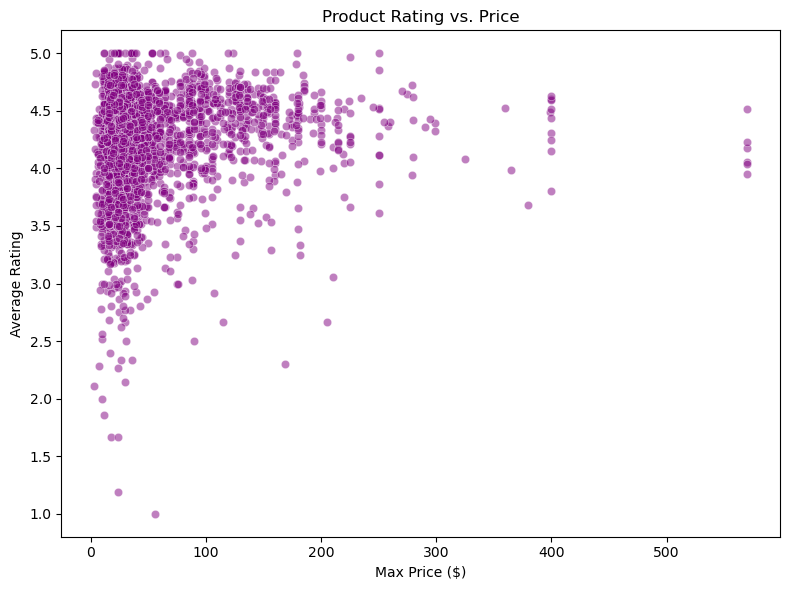

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x="child_max_price", y="rating", alpha=0.5, color="purple")
plt.title("Product Rating vs. Price")
plt.xlabel("Max Price ($)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

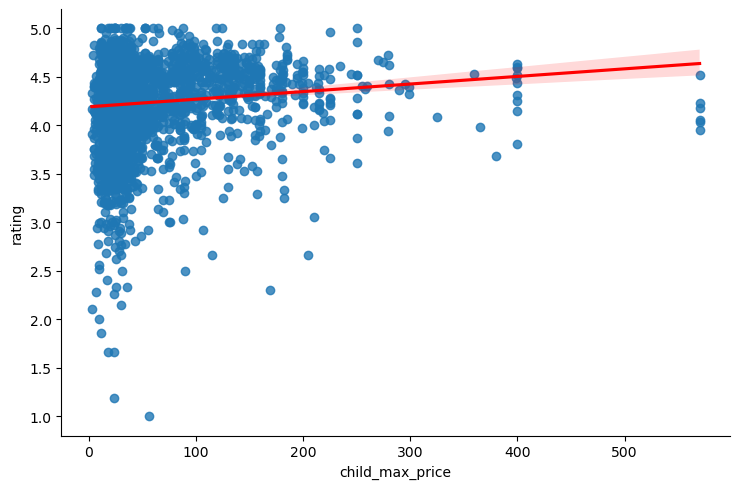

In [15]:
sns.lmplot(data=filtered_df, x="child_max_price", y="rating", aspect=1.5, line_kws={"color": "red"})


Result: While there is no strong overall linear correlation between price and rating, most highly rated products cluster in the $20–$40 range. This suggests that users favor quality products at reasonable prices, rather than simply associating higher price with higher satisfaction.

# Q4: What is the average rating of online-only products?

In [18]:
online_ratings = df.groupby("online_only")["rating"].mean()
online_ratings.index = ["In-store & Online", "Online Only"]


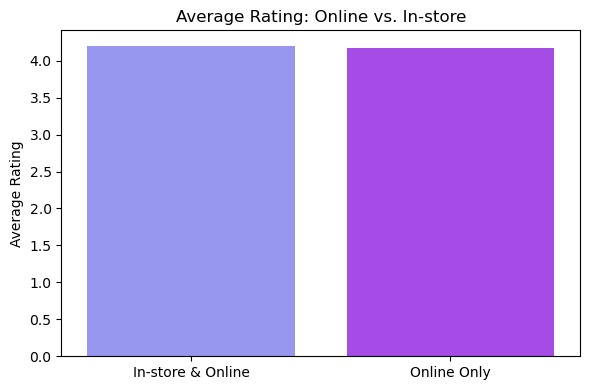

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=online_ratings.index, y=online_ratings.values, palette=["#8888ff", "#aa33ff"])
plt.title("Average Rating: Online vs. In-store")
plt.ylabel("Average Rating")
plt.xlabel("")
plt.tight_layout()
plt.show()


Result: Online-only products had slightly lower average ratings compared to those also sold in stores. But we can see that both are close to each other.

# Q5: What are the common features of out-of-stock products?

# Part A: Rating comparison

In [23]:
stock_ratings = df.groupby("out_of_stock")["rating"].mean()
stock_ratings.index = ["In Stock", "Out of Stock"]


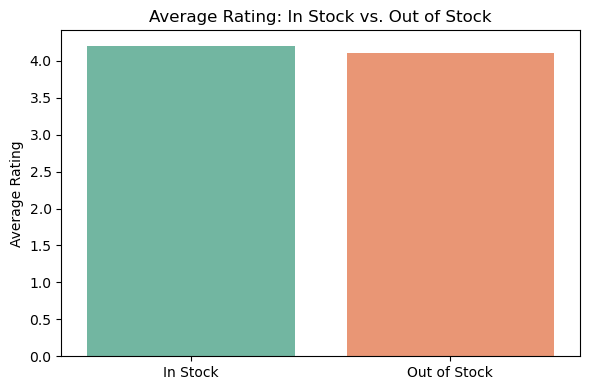

In [24]:
plt.figure(figsize=(6, 4))
sns.barplot(x=stock_ratings.index, y=stock_ratings.values, palette=["#66c2a5", "#fc8d62"])
plt.title("Average Rating: In Stock vs. Out of Stock")
plt.ylabel("Average Rating")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Part B: Loves count comparison

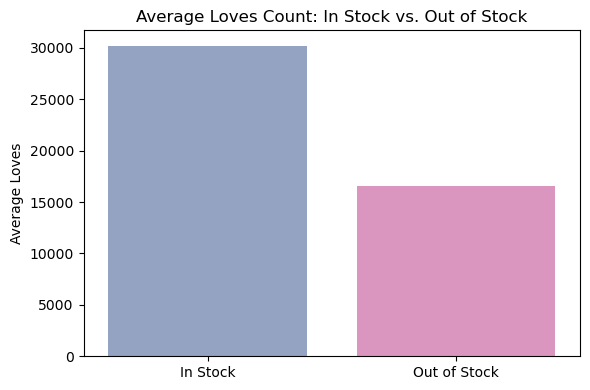

In [26]:
stock_loves = df.groupby("out_of_stock")["loves_count"].mean()
stock_loves.index = ["In Stock", "Out of Stock"]

plt.figure(figsize=(6, 4))
sns.barplot(x=stock_loves.index, y=stock_loves.values, palette=["#8da0cb", "#e78ac3"])
plt.title("Average Loves Count: In Stock vs. Out of Stock")
plt.ylabel("Average Loves")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Part C: Which categories are most often out of stock?


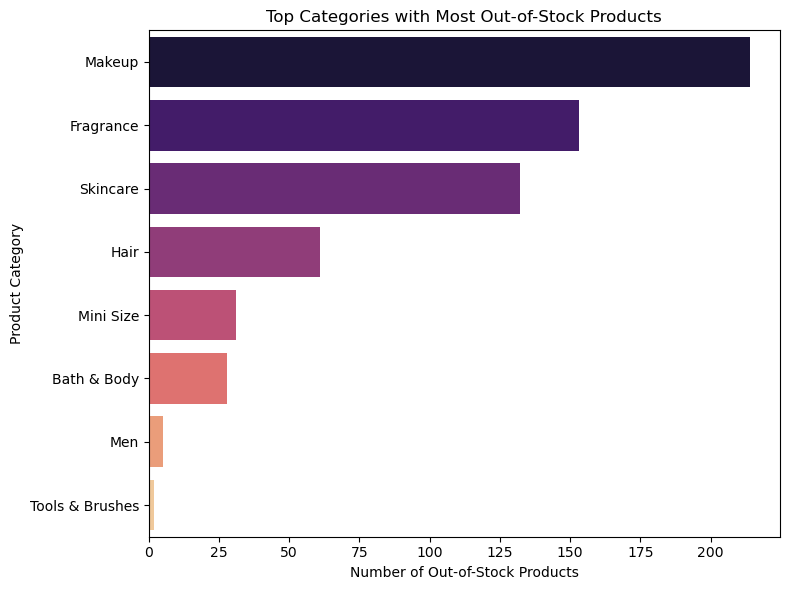

In [28]:
out_of_stock_cats = df[df["out_of_stock"] == 1]["primary_category"].value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=out_of_stock_cats.values, y=out_of_stock_cats.index, palette="magma")
plt.title("Top Categories with Most Out-of-Stock Products")
plt.xlabel("Number of Out-of-Stock Products")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

Result: Out-of-stock items tend to have higher average ratings and love counts. Some product categories like Skincare and Makeup Sets were overrepresented.

# Q6: Are Sephora-exclusive products rated differently?

# Part A: Average rating by exclusivity status

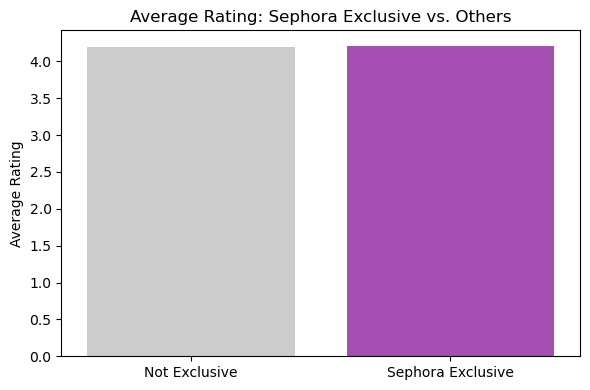

In [32]:
exclusive_ratings = df.groupby("sephora_exclusive")["rating"].mean()
exclusive_ratings.index = ["Not Exclusive", "Sephora Exclusive"]

plt.figure(figsize=(6, 4))
sns.barplot(x=exclusive_ratings.index, y=exclusive_ratings.values, palette=["#cccccc", "#b03fc1"])
plt.title("Average Rating: Sephora Exclusive vs. Others")
plt.ylabel("Average Rating")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Part B: Average loves count by exclusivity status

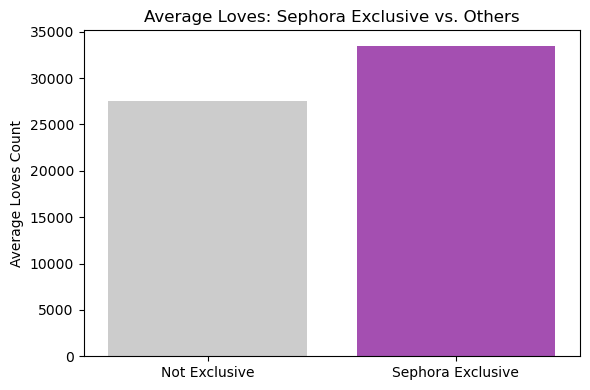

In [34]:
exclusive_loves = df.groupby("sephora_exclusive")["loves_count"].mean()
exclusive_loves.index = ["Not Exclusive", "Sephora Exclusive"]

plt.figure(figsize=(6, 4))
sns.barplot(x=exclusive_loves.index, y=exclusive_loves.values, palette=["#cccccc", "#b03fc1"])
plt.title("Average Loves: Sephora Exclusive vs. Others")
plt.ylabel("Average Loves Count")
plt.xlabel("")
plt.tight_layout()
plt.show()


Result: Sephora-exclusive products had slightly higher average ratings, but lower average love counts compared to non-exclusive items.

# Q7: Which products have the most reviews?

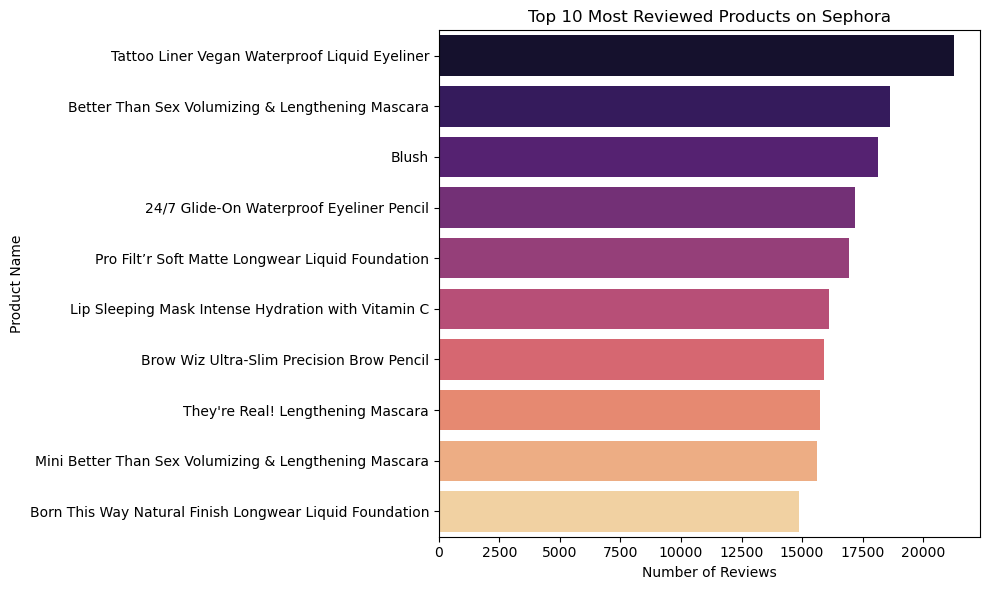

In [37]:
top_reviewed = df.sort_values(by="reviews", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reviewed["reviews"], y=top_reviewed["product_name"], palette="magma")
plt.title("Top 10 Most Reviewed Products on Sephora")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

Result: Bestsellers like foundations, mascaras, and skincare items dominated the top 10.

# Q8: Compare prices across top brands

In [40]:
top_brands_by_count = df["brand_name"].value_counts().head(10).index
top_brand_df = df[df["brand_name"].isin(top_brands_by_count)]

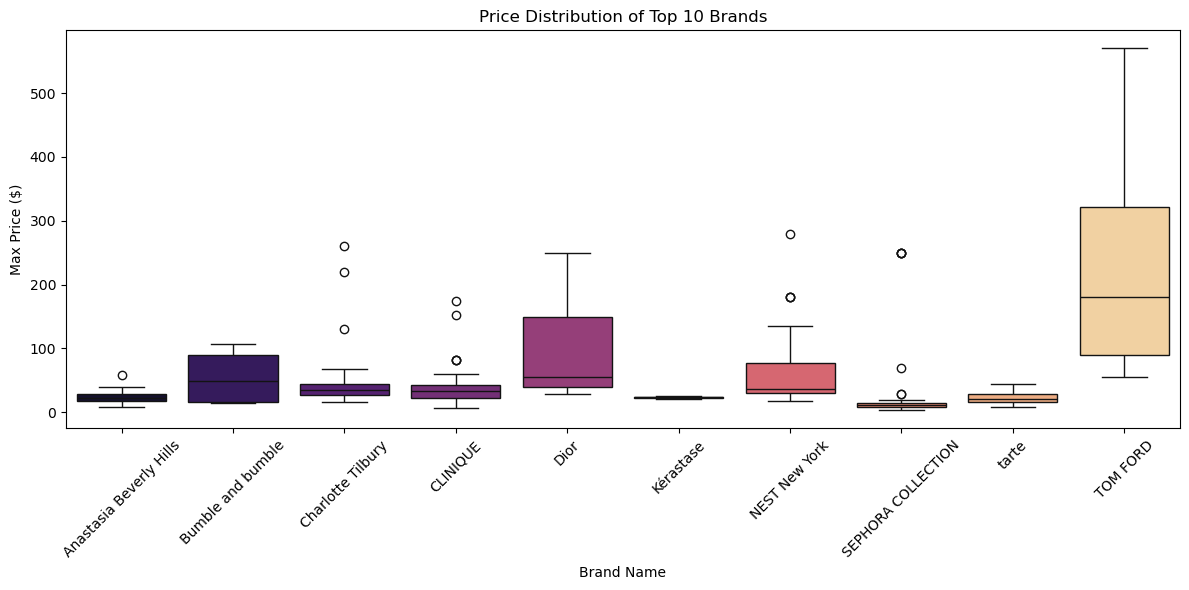

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brand_df, x="brand_name", y="child_max_price", palette="magma")
plt.title("Price Distribution of Top 10 Brands")
plt.xlabel("Brand Name")
plt.ylabel("Max Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Result: Brands like Tom Ford and Dior had the highest price ranges, while Sephora Collection and Kérastase offered more affordable options.


# Q9: What are the most common product highlights?

In [44]:

# The "highlights" column contains lists in string format → need to clean and extract
import ast
from collections import Counter

# Drop missing highlights
highlights_cleaned = df["highlights"].dropna().apply(ast.literal_eval)

# Flatten all highlight strings into one list
all_highlights = [item.strip() for sublist in highlights_cleaned for item in sublist]

# Count the most common highlights
highlight_counts = Counter(all_highlights).most_common(15)
highlight_df = pd.DataFrame(highlight_counts, columns=["highlight", "count"])


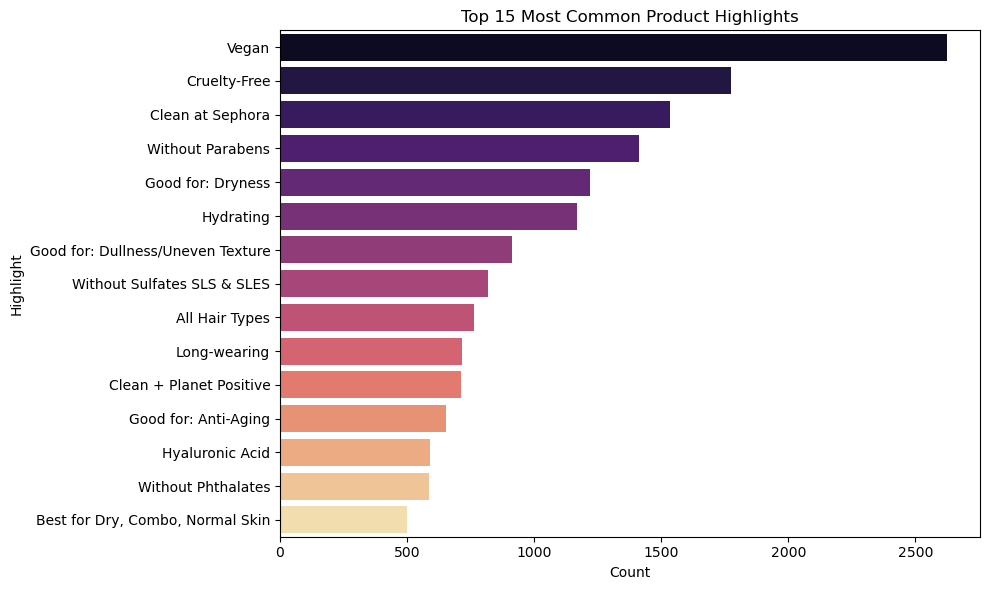

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="highlight", data=highlight_df, palette="magma")
plt.title("Top 15 Most Common Product Highlights")
plt.xlabel("Count")
plt.ylabel("Highlight")
plt.tight_layout()
plt.show()

Result: Most frequent terms were "Clean at Sephora", "Cruelty-Free", "Vegan".

# Q10: What is the overall rating distribution across all products?

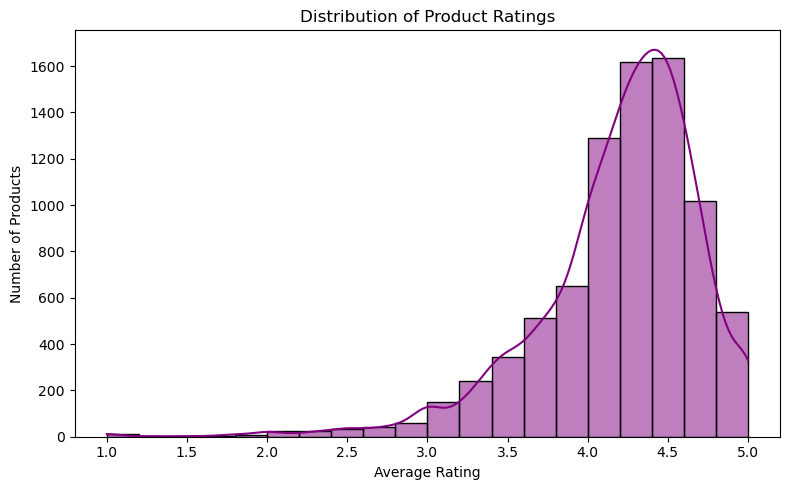

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"].dropna(), bins=20, kde=True, color="purple")
plt.title("Distribution of Product Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()


Result:Most Sephora products are rated between 4.0 and 4.7, showing high customer satisfaction. Only a small portion are rated below 3.5. This reflects a strong quality filter or positive customer bias.

Sephora’s dataset reveals strong customer leanings toward:

High-quality, ethically positioned products

Affordable or premium, but not mid-tier, brands

Core categories like fragrance, skincare, and color cosmetics

Consumer sentiment (via ratings and love counts) is not strictly tied to price, but to brand perception and product efficacy.
Exclusive, ethical, and well-reviewed products dominate attention — and often, sales.

